## Dram Data Upload

In [1]:
# Importing the required libraries/modules

import os  # Provides functions for interacting with the operating system
import re  # Allows working with regular expressions
import datetime  # Provides classes for working with dates and times
import pandas as pd  # Provides data manipulation and analysis tools
import numpy as np  # Provides numerical computing tools
import matplotlib.pyplot as plt  # Provides data visualization capabilities
import pandas_gbq  # Provides tools for working with Google BigQuery in pandas
import janitor  # Provides additional data cleaning functions
from google.cloud import bigquery  # Provides client libraries for Google BigQuery
from google.oauth2 import service_account  # Provides tools for authenticating with Google Cloud services using a service account

### GBQ Set Up

In this next section we connect to our GBQ project and list the data sets inside to test the connection.

In [2]:
# Building the private key.

# This line assigns the string representing the path to the JSON file to the variable service_path. It specifies the 
# directory path where the JSON file is located.

service_path = "C:\\Users\\rsmcd\\OneDrive\\Desktop\\MSBA Fall 2022\\" # Path to json file.

# This line assigns the string representing the name of the JSON file to the variable service_file. It specifies the 
# name of the JSON file, including its extension.

service_file = 'reese-msba-9558fdd20984.json' # Name of json file.

# This line assigns the string representing the name of the Google BigQuery project to the variable gbq_proj_id. It 
# specifies the project ID associated with the Google BigQuery service.

gbq_proj_id = 'reese-msba' # Name of project.

# This line concatenates the service_path and service_file variables to form the complete file path to the JSON file. 
# It assigns this concatenated path string to the variable private_key. The private_key variable now holds the full 
# path to the JSON file, which can be used to authenticate and access the Google BigQuery service.

private_key =service_path + service_file # Creates single variable that leads to json file.

In [5]:
# A connection to Google BigQuery is established here using the credentials from a service account JSON file. The code then 
# lists the datasets available in the connected BigQuery project.

# Now we pass in our credentials so that Python has permission to access our project. This line uses the 
# from_service_account_file() method from the service_account module to create credentials for authentication. It takes 
# the complete file path to the service account JSON file (service_path + service_file) and generates the credentials 
# object.

credentials = service_account.Credentials.from_service_account_file(service_path + service_file)

# And finally we establish our connection. This line creates a BigQuery client object using the Client() constructor 
# from the bigquery module. It passes the credentials object and the gbq_proj_id as parameters to authenticate the 
# client connection. This establishes the connection to the specified BigQuery project.

client = bigquery.Client(credentials = credentials, project=gbq_proj_id)

# Look at list of data sets in client. This code block uses a for loop to iterate over the datasets in the connected 
# BigQuery project. The client.list_datasets() method retrieves a list of all datasets, and each item represents a 
# dataset. The item.full_dataset_id attribute is printed, which contains the full identifier of the dataset, including 
# the project ID and dataset name.

for item in client.list_datasets() : 
    print(item.full_dataset_id)

reese-msba:dram_shop
reese-msba:wedge_transactions


### Checking for and deleting monthly tables

In this section, check for a table with the name `dram_items_2022`. If that table exists, delete it with the `delete_table` function. 

In [6]:
# Checking for dram_2022.

# This line assigns the string value 'dram_shop' to the variable dataset_id.

dataset_id = 'dram_shop'

# In this line, a function or method list_tables() is called on the object client with the argument dataset_id. This 
# function retrieves a list of tables within the dataset specified by dataset_id. The resulting list of tables is 
# assigned to the variable tables.

tables = client.list_tables(dataset_id)

# This line starts a for loop that iterates over each element in the tables list. The loop assigns each table from 
# the list to the variable table one at a time, allowing for further operations to be performed on each table.

for table in tables:
    
    # Within the for loop, this line prints the table_id attribute of the current table object. It outputs the 
    # identifier of each table in the tables list, one at a time, to the console.
    
    print(table.table_id)

dram_items_20150101
dram_items_20150301
dram_items_20150401
dram_items_20150501
dram_items_20150601
dram_items_20150701
dram_items_20150801
dram_items_20150901
dram_items_20151001
dram_items_20151101
dram_items_20151201
dram_items_20160101
dram_items_20160201
dram_items_20160301
dram_items_20160401
dram_items_20160501
dram_items_20160601
dram_items_20160701
dram_items_20160801
dram_items_20160901
dram_items_20161001
dram_items_20161101
dram_items_20161201
dram_items_20170101
dram_items_20170201
dram_items_20170301
dram_items_20170401
dram_items_20170501
dram_items_20170601
dram_items_20170701
dram_items_20170801
dram_items_20170901
dram_items_20171001
dram_items_20171101
dram_items_20171201
dram_items_20180101
dram_items_20180201
dram_items_20180301
dram_items_20180401
dram_items_20180501
dram_items_20180601
dram_items_20180701
dram_items_20180801
dram_items_20180901
dram_items_20181001
dram_items_20181101
dram_items_20181201
dram_items_20190101
dram_items_20190201
dram_items_20190301


In [7]:
# Deleting dram_2022.

# This line assigns the string value 'dram_2022' to the variable table_name.

table_name = 'dram_2022'

# In this line, the join method is used to concatenate the values of three variables: gbq_proj_id, dataset_id, 
# and table_name. The values are joined together with a period ('.') as the separator. The resulting string is then 
# assigned to the variable table_id. This line constructs a fully qualified table identifier.

table_id = ".".join([gbq_proj_id,dataset_id,table_name])

print(table_id)

reese-msba.dram_shop.dram_2022


In [8]:
# This line calls the delete_table() method on the client object, passing table_id as the argument. This method is 
# typically used to delete a table from a database or storage system. The not_found_ok=True parameter indicates that 
# if the specified table is not found, it should be considered as already deleted and no error should be raised.

client.delete_table(table_id, not_found_ok=True)

# After the deletion is attempted, this line prints a message to the console using an f-string. The message includes 
# the value of table_id within the curly braces {}, indicating the table identifier that was attempted to be deleted. 
# The printed message informs that the table with the specified table_id has been deleted (or a message stating deletion 
# even if the table was not found).

print(f"Deleted {table_id}.")

Deleted reese-msba.dram_shop.dram_2022.


### Reading in and modifying data

In this section, we read in the data using the Pandas `read_csv` function. Once you've read in the data, make the following modifications to it: 

* Convert the fields that have dollar signs (such as `gross_sales`) into numeric data. Watch out for dollar signs and commas.
* Change the type of the column `modifiers_applied` to string.
* Replace the `sku` column with a column of empty strings. 
* Clean the names with the janitor package.


In [9]:
# Reading in the csv file to dram_2022.

dram_2022 = pd.read_csv('items-2022-01-01-2022-10-01.csv')

#print(dram_2022)
print(dram_2022.head(5))
#print(dram_2022.tail(10))

         Date      Time                    Time Zone  \
0  2022-09-30  23:41:41  Mountain Time (US & Canada)   
1  2022-09-30  23:41:41  Mountain Time (US & Canada)   
2  2022-09-30  23:41:41  Mountain Time (US & Canada)   
3  2022-09-30  23:41:41  Mountain Time (US & Canada)   
4  2022-09-30  23:41:41  Mountain Time (US & Canada)   

                      Category                                      Item  Qty  \
0                F-IPA Draught  18G Masquerade DDH NE IPA Imagine Nation    1   
1             F - Hard Seltzer            29M Lychee Kozo - New Hokkadio    1   
2             F - Hard Seltzer            29M Lychee Kozo - New Hokkadio    2   
3  F-Lagers/Pils/Wheat Draught           01P Premium Pilsner - Bitburger    1   
4                F-IPA Draught  18G Masquerade DDH NE IPA Imagine Nation    1   

  Price Point Name  SKU  Modifiers Applied Gross Sales  ...  \
0           Goblet  NaN                NaN       $7.50  ...   
1           Munich  NaN                NaN       $

C:\Users\rsmcd\AppData\Local\Temp\ipykernel_43404\1380372227.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dram_2022 = pd.read_csv('items-2022-01-01-2022-10-01.csv')


In [10]:
# This line calls the clean_names() function from the janitor module, passing dram_2022 as the argument. The clean_names() 
# function is typically used to clean and standardize column names in a dataframe or table.

dram_2022 = janitor.clean_names(dram_2022)

In [11]:
# Show head of data frame after cleaning names.

dram_2022.head()

,date,time,time_zone,category,item,qty,price_point_name,sku,modifiers_applied,gross_sales,...,details,event_type,location,dining_option,customer_id,customer_name,customer_reference_id,unit,count,itemization_type
0,2022-09-30,23:41:41,Mountain Time (US & Canada),F-IPA Draught,18G Masquerade DDH NE IPA Imagine Nation,1,Goblet,NaN,NaN,$7.50,...,https://squareup.com/dashboard/sales/transacti...,Payment,The Dram Shop Front St.,NaN,RSQBM8CAWN2YN0S1KSMKDHXRYW,Stuart Landers,NaN,ea,1,Item
1,2022-09-30,23:41:41,Mountain Time (US & Canada),F - Hard Seltzer,29M Lychee Kozo - New Hokkadio,1,Munich,NaN,NaN,$4.50,...,https://squareup.com/dashboard/sales/transacti...,Payment,The Dram Shop Front St.,NaN,RSQBM8CAWN2YN0S1KSMKDHXRYW,Stuart Landers,NaN,ea,1,Item
2,2022-09-30,23:41:41,Mountain Time (US & Canada),F - Hard Seltzer,29M Lychee Kozo - New Hokkadio,2,Munich,NaN,NaN,$9.00,...,https://squareup.com/dashboard/sales/transacti...,Payment,The Dram Shop Front St.,NaN,RSQBM8CAWN2YN0S1KSMKDHXRYW,Stuart Landers,NaN,ea,2,Item
3,2022-09-30,23:41:41,Mountain Time (US & Canada),F-Lagers/Pils/Wheat Draught,01P Premium Pilsner - Bitburger,1,Pilsner,NaN,NaN,$6.00,...,https://squareup.com/dashboard/sales/transacti...,Payment,The Dram Shop Front St.,NaN,RSQBM8CAWN2YN0S1KSMKDHXRYW,Stuart Landers,NaN,ea,1,Item
4,2022-09-30,23:41:41,Mountain Time (US & Canada),F-IPA Draught,18G Masquerade DDH NE IPA Imagine Nation,1,Goblet,NaN,NaN,$7.50,...,https://squareup.com/dashboard/sales/transacti...,Payment,The Dram Shop Front St.,NaN,RSQBM8CAWN2YN0S1KSMKDHXRYW,Stuart Landers,NaN,ea,1,Item


In [12]:
# Build function for removing $'s and ,'s.

# This line defines a function named clean_amounts that takes one parameter x.

def clean_amounts(x):
    
    # Within the function, this line replaces all occurrences of the dollar sign ($) in the value of x with an empty 
    # string (""). It removes the dollar sign from the input.
    
    x = x.replace("$","")
    
    # This line replaces all occurrences of commas (,) in the value of x with an empty string (""). It removes the 
    # commas from the input.
    
    x = x.replace(",","")
    
    # This line returns the modified value of x as the result of the function.
    
    return(x)

# This line defines a function named empty_sku that takes one parameter x.

def empty_sku(x):
    
    # Within the function, this line replaces all occurrences of the string "nan" in the value of x with an empty 
    # string (""). It removes the occurrences of "nan" from the input.
    
    x = x.replace("nan","")
    
    # This line replaces all occurrences of the string "Goblet" in the value of x with an empty string (""). It 
    # removes the occurrences of "Goblet" from the input.
    
    x = x.replace("Goblet","")
    
    # This line returns the modified value of x as the result of the function.
    
    return(x)

print(clean_amounts("$987.00"))

987.00


In [13]:
# Modifying columns

# The map() takes function and applies it one cell at a time to a column.

dram_2022['gross_sales']=pd.to_numeric(dram_2022['gross_sales'].map(clean_amounts))
dram_2022['discounts']=pd.to_numeric(dram_2022['discounts'].map(clean_amounts))
dram_2022['net_sales']=pd.to_numeric(dram_2022['net_sales'].map(clean_amounts))
dram_2022['tax']=pd.to_numeric(dram_2022['tax'].map(clean_amounts))

# Another way to convert to numeric.
#dram_2022['gross_sales']=dram_2022.gross_sales.astype(np.int64)
#print(dram_2022)

#dram_2022.dtypes

In [14]:
# Change the type of the column `modifiers_applied` to string.

dram_2022.modifiers_applied = dram_2022.modifiers_applied.astype('str')

In [15]:
# Replace the `sku` column with a column of empty strings by mapping the empty_sku function to the column after setting
# the data type as string.

dram_2022.sku = dram_2022.sku.astype('str').map(empty_sku)

print(dram_2022['sku'])

0          
1          
2          
3          
4          
         ..
110831     
110832     
110833     
110834     
110835     
Name: sku, Length: 110836, dtype: object


In [16]:
# Print all modified columns.

print(dram_2022[['gross_sales','discounts','net_sales','tax','modifiers_applied','sku']])

        gross_sales  discounts  net_sales  tax modifiers_applied sku
0               7.5      -3.75       3.75  0.0               nan    
1               4.5      -2.25       2.25  0.0               nan    
2               9.0      -4.50       4.50  0.0               nan    
3               6.0      -3.00       3.00  0.0               nan    
4               7.5      -3.75       3.75  0.0               nan    
...             ...        ...        ...  ...               ...  ..
110831          2.5       0.00       2.50  0.0               nan    
110832         21.0       0.00      21.00  0.0               nan    
110833          4.5       0.00       4.50  0.0               nan    
110834         27.0       0.00      27.00  0.0               nan    
110835          5.5       0.00       5.50  0.0               nan    

[110836 rows x 6 columns]


### Upoad your data to GBQ

Using the Pandas function `to_gbq`, upload your data to GBQ.

In [19]:
# Upload data to GBQ.

# This line assigns the string value 'reese-msba' to the variable gbq_proj_id. It represents the project ID or name for 
# the Google BigQuery project.

gbq_proj_id = 'reese-msba'

# This line assigns the string value 'dram_shop' to the variable dataset_id. It represents the ID or name of the 
# dataset within the Google BigQuery project.

dataset_id = 'dram_shop'

# This line assigns the string value 'dram_2022' to the variable table_name. It represents the name of the table within 
# the specified dataset.

table_name = 'dram_2022'

# In this line, the join() method is used to concatenate the values of gbq_proj_id, dataset_id, and table_name using a 
# period ('.') as the separator. The resulting string is assigned to the variable table_id. This line constructs the 
# fully qualified table identifier for the table in the Google BigQuery project.

table_id = ".".join([gbq_proj_id,dataset_id,table_name])

# This line calls the to_gbq() function from the pandas_gbq library. It is used to write the dram_2022 DataFrame to the 
# specified table in Google BigQuery. The function takes the following arguments:
# dram_2022: The DataFrame to be written to the table.
# table_id: The fully qualified table identifier where the DataFrame should be written.
# project_id: The ID or name of the Google BigQuery project.
# if_exists: Specifies the behavior if the table already exists. In this case, "replace" is specified, which means that 
# if the table exists, it will be replaced with the new data.

pandas_gbq.to_gbq(dram_2022, table_id, project_id=gbq_proj_id,if_exists="replace")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


### Query your data

Let's start by counting the rows in your data. Here's an example of how to do that, though you'll need to update the project and data set parameters in the query below. Note that the query inside the triple quotes can just be run the console. 

In [20]:
# Count the number of rows in the dataframe

# This multi-line string variable count_query contains a SQL query. It uses the COUNT(*) function to count the total 
# number of rows in the table named dram_2022 within the dram_shop dataset of the reese-msba project. The query selects 
# the count result from the table.

count_query = """
    SELECT COUNT(*)
    FROM `reese-msba.dram_shop.dram_2022`
"""

# This line executes the count_query using the client.query() method. It sends the query to Google BigQuery and retrieves 
# the query results. The variable count_query_results holds the query result object.

count_query_results = client.query(count_query)

# This loop iterates over the count_query_results object, which contains the query result rows. For each row, it prints 
# the count value. The row[0] retrieves the first element of each row, which corresponds to the count value returned 
# by the query. The count value is then formatted within the printed string to indicate the number of rows in the table.

for row in count_query_results :
    print(f'There were {row[0]} rows.')


There were 110836 rows.


You can also bring results back into a data frame with `pandas_gbq`. 

In [21]:
# Pulls a query from gbq project and displays it here in JupNB.

# This multi-line string variable query contains a SQL query. The query selects the customer_name, customer_id, and 
# the sum of gross_sales columns from the dram_2022 table within the dram_shop dataset of the reese-msba project. The 
# query includes a WHERE clause to filter out rows where customer_name is not empty. It groups the results by 
# customer_name and customer_id using the GROUP BY clause. Finally, it orders the results in descending order based on 
# the gross_sales column using the ORDER BY clause.

query = """
    SELECT customer_name, customer_id, SUM(gross_sales) AS gross_sales
    FROM `reese-msba.dram_shop.dram_2022`
    WHERE customer_name != ""
    GROUP BY customer_name, customer_id
    ORDER BY gross_sales DESC
"""

# This line uses the pandas_gbq.read_gbq() function to execute the query on Google BigQuery. It retrieves the query 
# result as a DataFrame and assigns it to the variable customer_spend. The project_id parameter is used to specify 
# the ID or name of the Google BigQuery project.

customer_spend = pandas_gbq.read_gbq(query, project_id = gbq_proj_id)

customer_spend.head()

Downloading: 100%|██████████████████████████████████████████████████████████| 14507/14507 [00:01<00:00, 13238.43rows/s]


,customer_name,customer_id,gross_sales
0,Elizabeth Hunter,HDZVV6GTHH2E5BXBXV8V6SMFJG,2942.90
1,paige pitzer,K6X88Q94W15NF6JE69Z6CZ2PHG,2672.52
2,William Kent,CESZ8TF21N30B5WT0E6GQY50CR,2419.00
3,Jason Whitelock,0VME2ZWWEX24XECG6TB2VNBP94,2163.24
4,Andrew Mozzer,7H2QK5DPRD63ZF5JH2SM7Q5AVW,2059.75


In [22]:
customer_spend.describe()

,gross_sales
count,14507.000000
mean,41.689854
std,94.357769
min,1.000000
25%,11.000000
50%,20.000000
75%,39.000000
max,2942.900000


Now some additional work for you. Write a query that returns sales by day by category for the Front Street location to a data frame. Call this data frame `daily_category_sales` with columns `date`, `category`, and `gross_sales` (which is the sum of sales for that date and category.

If you've done this correctly, the cells below should run correctly and summarize the data for you and do some plotting. 

In [23]:
# Bring gbq dataframe into pandas.

# This multi-line string variable daily_category_sales_query contains a SQL query. The query selects the date, category, 
# and the sum of gross_sales columns from the dram_2022 table within the dram_shop dataset of the reese-msba project. The 
# query includes a WHERE clause to filter rows where the location column is equal to "The Dram Shop Front St.". It groups 
# the results by date and category using the GROUP BY clause. Finally, it orders the results in descending order based on 
# the gross_sales column using the ORDER BY clause.

daily_category_sales_query = """
    SELECT date, category, SUM(gross_sales) AS gross_sales
    FROM `reese-msba.dram_shop.dram_2022`
    WHERE location = "The Dram Shop Front St."
    GROUP BY date, category
    ORDER BY gross_sales DESC
"""

# This line uses the pandas_gbq.read_gbq() function to execute the daily_category_sales_query on Google BigQuery. It 
# retrieves the query result as a DataFrame and assigns it to the variable daily_category_sales. The project_id parameter 
# is used to specify the ID or name of the Google BigQuery project.

daily_category_sales = pandas_gbq.read_gbq(daily_category_sales_query,project_id = gbq_proj_id)

daily_category_sales.head()

Downloading: 100%|████████████████████████████████████████████████████████████| 5550/5550 [00:00<00:00, 12921.27rows/s]


,date,category,gross_sales
0,2022-09-24,F-Seasonal,1022.00
1,2022-02-24,F-Seasonal,1004.50
2,2022-04-02,F-IPA Draught,961.75
3,2022-04-01,F-IPA Draught,928.25
4,2022-03-04,F-IPA Draught,823.25


In [24]:
# Create a table of best selling categories.

# This line performs the following operations on the daily_category_sales DataFrame:
# groupby('category'): Groups the data by the 'category' column.
# sum('gross_sales'): Calculates the sum of the 'gross_sales' column for each category group.
# nlargest(10, 'gross_sales'): Selects the top 10 rows with the largest 'gross_sales' values. The DataFrame is sorted in 
# descending order based on 'gross_sales'.
# reset_index(): Resets the index of the resulting DataFrame, assigning a new default index.

category_summary = daily_category_sales.groupby('category').sum('gross_sales').nlargest(10,'gross_sales').reset_index()

category_summary

,category,gross_sales
0,F-IPA Draught,106691.75
1,F-Lagers/Pils/Wheat Draught,49730.00
2,F-Wine Draught,30619.75
3,F-Cider Draught,25524.25
4,F-Sour Draught,21662.00
5,F-Amber/Pale Draught,20298.50
6,F-Seasonal,16524.25
7,F-Porter/Stout Draught,13548.75
8,BTG Features!,10450.50
9,Kombucha,9671.50


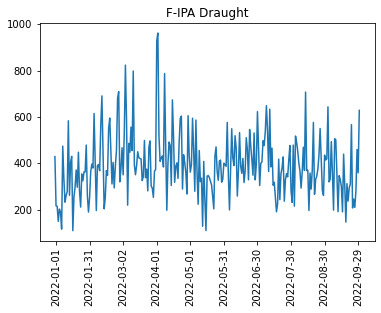

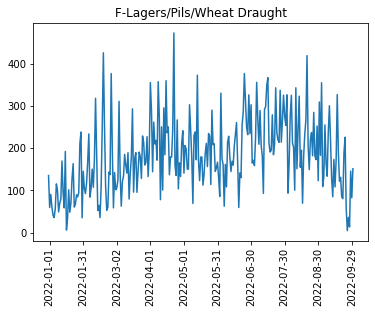

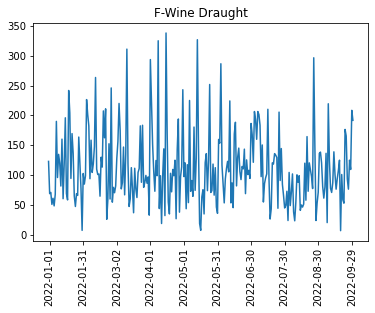

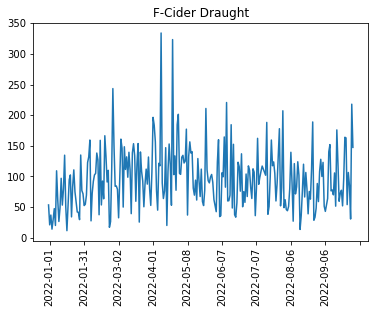

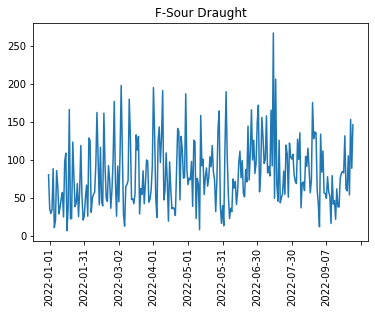

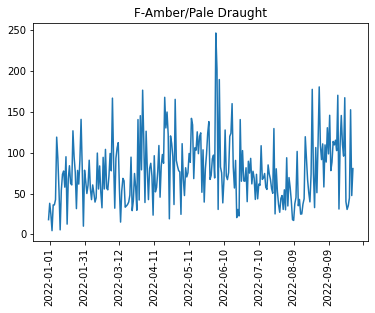

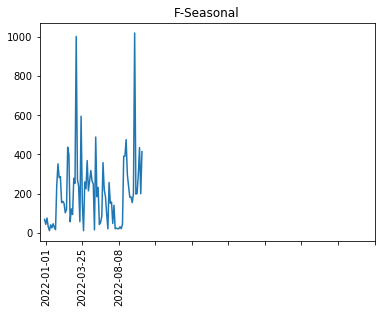

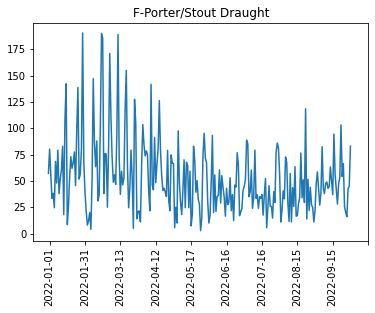

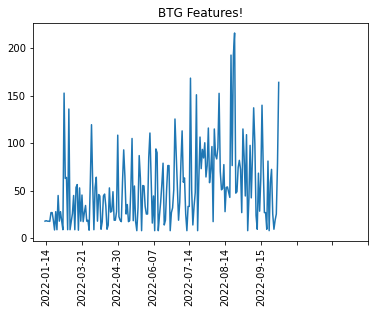

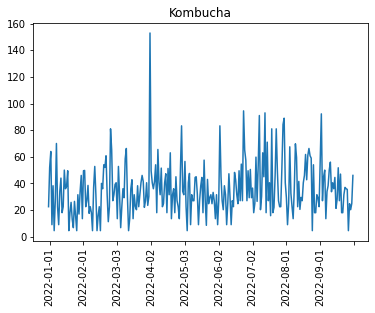

In [26]:
# Plot sales by date of F-IPA draught.

# This line initiates a loop that iterates over the 'category' column in the category_summary DataFrame.

for category in category_summary.category : 
    
    # This line queries the daily_category_sales DataFrame to filter rows where the 'category' column matches the 
    # current category in the loop. The filtered data is stored in the DataFrame df.
    
    df = daily_category_sales.query(f"category == '{category}'")
    
    # This line sorts the df DataFrame in ascending order based on the 'date' column. This step ensures that the 
    # data is plotted in chronological order.
    
    df = df.sort_values('date', ascending=True)
    
    # This line creates a line plot using the 'date' column as the x-axis and the 'gross_sales' column as the 
    # y-axis. It plots the sales data for the current category.
    
    plt.plot(df['date'], df['gross_sales'])
    
    # This line sets the x-axis ticks at regular intervals, showing every 30th tick, and rotates the tick labels 
    # vertically for better readability.
    
    plt.xticks(ticks=range(1,300,30),rotation='vertical')
    
    plt.title(category)
    
    plt.show()